In [1]:
import numpy as np
import pandas as pd 
import pickle
from pathlib import Path
import polars as pl
from tqdm import tqdm

In [2]:
dtypes = {'buildingblock1_smiles': np.int16, 'buildingblock2_smiles': np.int16, 'buildingblock3_smiles': np.int16,
          'binds_BRD4':np.byte, 'binds_HSA':np.byte, 'binds_sEH':np.byte}

directory = Path("../../data/shrunken/")

In [3]:
train_data =  pl.read_parquet(directory / "train.parquet")
train_data = train_data.to_pandas(use_pyarrow_extension_array=True)

In [9]:
train_dicts1 = pickle.load(open(directory / "train_dicts/BBs_dict_reverse_1.p", "rb"))
train_dicts2 = pickle.load(open(directory / "train_dicts/BBs_dict_reverse_2.p", "rb"))
train_dicts3 = pickle.load(open(directory / "train_dicts/BBs_dict_reverse_3.p", "rb"))

In [10]:
test_data =  pl.read_parquet(directory / "test.parquet")
test_data = test_data.to_pandas(use_pyarrow_extension_array=True)

In [11]:
test_dicts1 = pickle.load(open(directory / "test_dicts/BBs_dict_reverse_1_test.p", "rb"))
test_dicts2 = pickle.load(open(directory / "test_dicts/BBs_dict_reverse_2_test.p", "rb"))
test_dicts3 = pickle.load(open(directory / "test_dicts/BBs_dict_reverse_3_test.p", "rb"))

In [13]:
# Swap keys and values in the dictionaries
train_dicts1 = {v: k for k, v in train_dicts1.items()}
train_dicts2 = {v: k for k, v in train_dicts2.items()}
train_dicts3 = {v: k for k, v in train_dicts3.items()}

Text(0.5, 1.0, 'Distribution of buildingblock1_smiles where binds_sEH is 1')

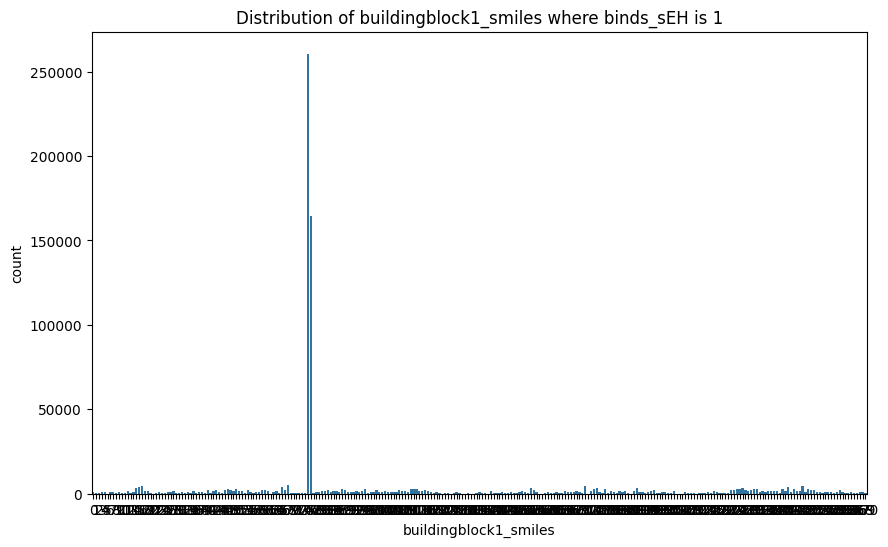

In [76]:
# Plot distribution of binding classes and building block smiles
import matplotlib.pyplot as plt
import seaborn as sns

# Print counts of buildingblock1_smiles where binds_sEH is 1
# plot_data = train_data
BUILDINGBLOCK = 'buildingblock1_smiles'
# print(plot_data[plot_data['binds_sEH'] == 1][BUILDINGBLOCK].value_counts())
# Count buildingblock1_smiles value counts
# print(train_data[train_data['binds_sEH'] == 1][BUILDINGBLOCK].value_counts())

# Plot distribution of buildingblock1_smiles where binds_sEH is 1
plt.figure(figsize=(10, 6))
sns.countplot(x=BUILDINGBLOCK, data=train_data[train_data['binds_sEH'] == 1])
plt.title(f'Distribution of {BUILDINGBLOCK} where binds_sEH is 1')

In [19]:
train_data.value_counts(BUILDINGBLOCK)

buildingblock2_smiles
524    235364
421    234792
510    234610
48     234440
632    234067
        ...  
91      49734
180     49388
653     49121
415     48917
438     48904
Name: count, Length: 693, dtype: int64

In [79]:
binds_seh_bb1 = train_data[train_data['binds_sEH'] == 1].value_counts('buildingblock3_smiles')
total_bb1 = train_data.value_counts('buildingblock3_smiles')
# Calculate percentage of buildingblock1_smiles where binds_sEH is 1
percentage_bb1 = binds_seh_bb1 / total_bb1 * 100

# Sort by percentage
percentage_bb1 = percentage_bb1.sort_values(ascending=False)
percentage_bb1

buildingblock3_smiles
298    15.251375
401    13.363888
596    11.040081
432     9.481264
30      9.018677
         ...    
736     0.035751
268     0.019221
304     0.014427
380     0.005332
640          NaN
Name: count, Length: 872, dtype: float64

In [37]:
binds_seh_bb1 = train_data[train_data['binds_HSA'] == 1].value_counts('buildingblock1_smiles')
total_bb1 = train_data.value_counts('buildingblock1_smiles')
# Calculate percentage of buildingblock1_smiles where binds_sEH is 1
percentage_bb1 = binds_seh_bb1 / total_bb1 * 100

# Sort by percentage
percentage_bb1 = percentage_bb1.sort_values(ascending=False)
percentage_bb1
total_bb1

buildingblock1_smiles
95     2.168478
172    1.708373
190    1.675418
17     1.597435
176    1.588993
         ...   
132    0.010184
21     0.009911
122    0.009362
157    0.004129
133    0.003306
Name: count, Length: 271, dtype: float64

In [30]:
binds = [0,0,0]
no_binds_seh_bb1 = train_data[(train_data['binds_BRD4'] == binds[0]) & (train_data['binds_HSA'] == binds[1]) & (train_data['binds_sEH'] == binds[2])].value_counts(BUILDINGBLOCK)
no_binds_seh_bb1

buildingblock2_smiles
524    233901
341    233004
301    232375
622    231915
658    231786
        ...  
438     48688
415     47996
608     44942
653     43303
339     42200
Name: count, Length: 693, dtype: int64

Text(0.5, 1.0, 'Distribution of buildingblock2_smiles where binds_sEH is 1')

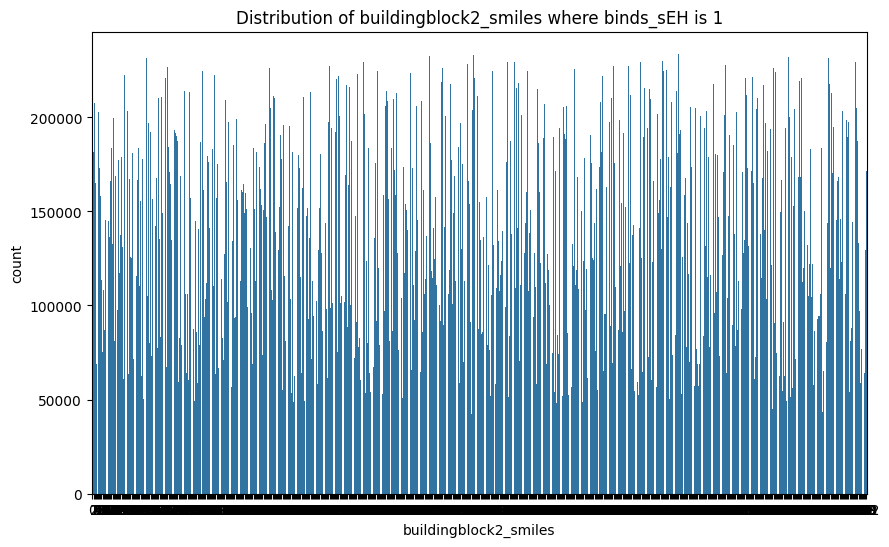

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='buildingblock1_smiles', data=train_data[(train_data['binds_BRD4'] == binds[0]) & (train_data['binds_HSA'] == binds[1]) & (train_data['binds_sEH'] == binds[2])])
plt.title(f'Distribution of {BUILDINGBLOCK} where binds_sEH is 1')

Text(0.5, 1.0, 'Distribution of buildingblock2_smiles where binds_sEH is 1')

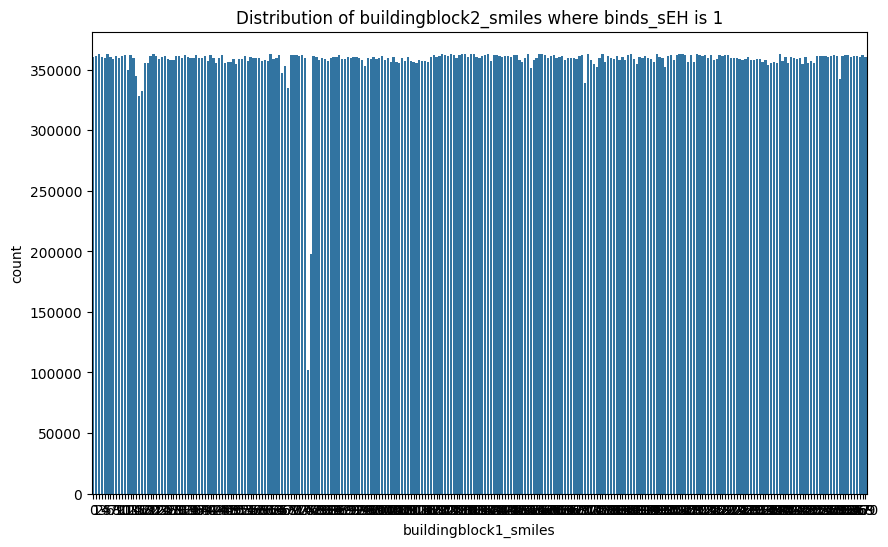

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='buildingblock1_smiles', data=train_data[(train_data['binds_BRD4'] == binds[0]) & (train_data['binds_HSA'] == binds[1]) & (train_data['binds_sEH'] == binds[2])])
plt.title(f'Distribution of {BUILDINGBLOCK} where binds_sEH is 1')

In [55]:
# Create a new column in test_data that is True if the building block is in the training set
test_data['bb1'] = test_data['buildingblock1_smiles'].map(test_dicts1)
test_data['in_training'] = test_data['bb1'].map(train_dicts1)
test_data['in_training'] = test_data['in_training'].notnull()
# Create hue value by setting in_training to 0 if false and 1 if true
test_data['in_training'] = test_data['in_training'].astype(int)


,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,is_BRD4,is_HSA,is_sEH,in_training,bb1
0,0,17,17,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,True,True,True,0,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O
1,0,17,87,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,True,True,True,0,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O
2,0,17,99,C#CCCC[C@H](Nc1nc(NCC2(O)CCCC2(C)C)nc(Nc2ccc(C...,True,True,True,0,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O
3,0,17,244,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2sc(Cl)c...,True,True,True,0,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O
4,0,17,394,C#CCCC[C@H](Nc1nc(NCC2CCC(SC)CC2)nc(Nc2ccc(C=C...,True,True,True,0,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O
...,...,...,...,...,...,...,...,...,...
878017,340,1050,814,Cn1ncc2cc(Nc3nc(Nc4nncs4)nc(N[C@@H](CCCN=[N+]=...,True,True,True,1,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...
878018,340,1050,877,[N-]=[N+]=NCCC[C@H](Nc1nc(NCC2CCC3CC3C2)nc(Nc2...,True,True,True,1,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...
878019,340,1051,259,COC(=O)c1ccnc(Nc2nc(Nc3noc4ccc(F)cc34)nc(N[C@@...,True,True,True,1,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...
878020,340,1051,292,COC1CCC(CCNc2nc(Nc3noc4ccc(F)cc34)nc(N[C@@H](C...,True,True,True,1,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...


In [56]:
# Test if the molecule_smiles has a triazine
from rdkit import Chem
TRIAZINE_SMILE = "c1ncncn1"
TRIAZINE = Chem.MolFromSmiles(TRIAZINE_SMILE)

In [58]:
test_data['molecule'] = test_data['molecule_smiles'].map(Chem.MolFromSmiles)
test_data['proprietary'] = test_data['molecule'].map(lambda x: not x.HasSubstructMatch(TRIAZINE))
# Give in_training 3 if proprietary is true


In [69]:
test_data['has_triazine'] = test_data['molecule'].map(lambda x: x.HasSubstructMatch(TRIAZINE))

In [71]:
test_data.value_counts('has_triazine')

has_triazine
False    486390
True     391632
Name: count, dtype: int64

In [62]:
test_data['in_training'] = test_data['proprietary'] * -3 + test_data['in_training']

In [64]:
test_data.value_counts('in_training')

in_training
2    486390
1    369039
0     22593
Name: count, dtype: int64

In [70]:
colors = {0: 'blue', 1: 'green', 2: 'red'}

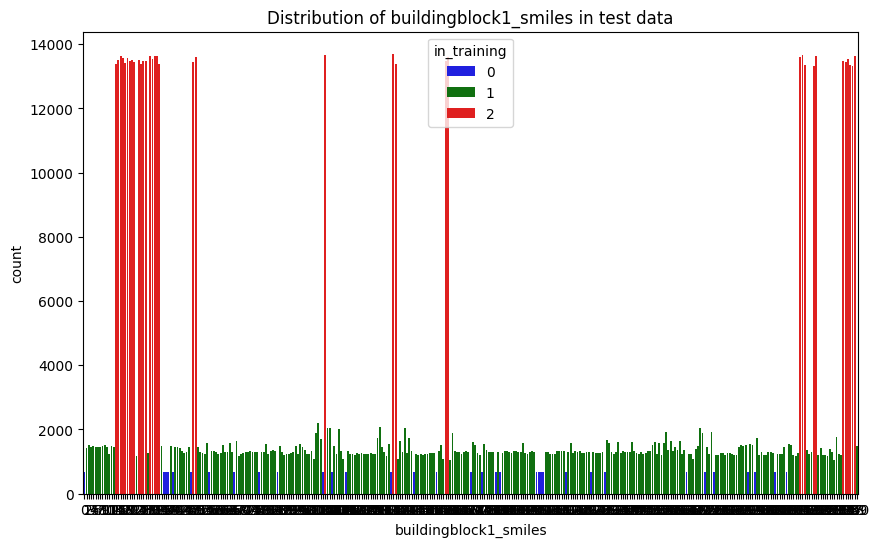

In [72]:
# Create a countplot for each building block in test, colour it by whether the building block is in the training set

plt.figure(figsize=(10, 6))
sns.countplot(x='buildingblock1_smiles', hue='in_training', data=test_data, palette=colors)
plt.title(f'Distribution of buildingblock1_smiles in test data')
plt.show()


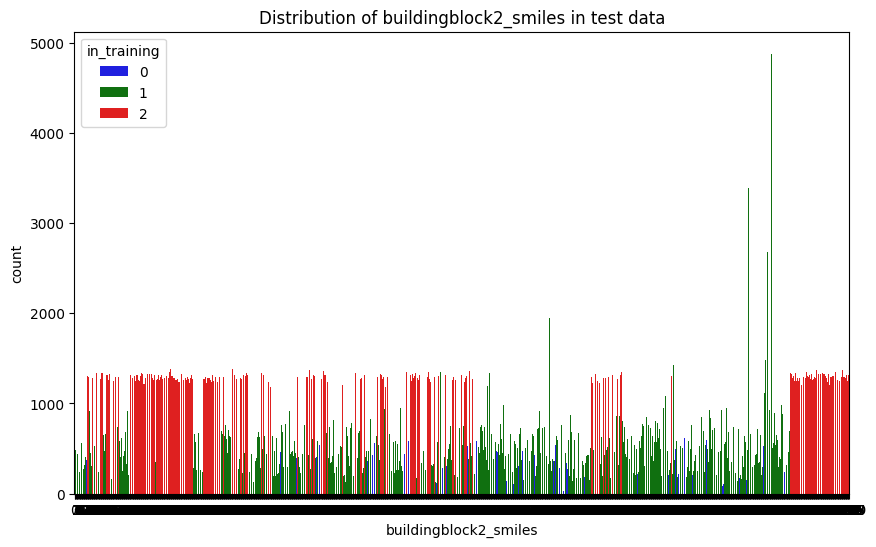

In [73]:
plt.figure(figsize=(10, 6))
# Set colors for hue

sns.countplot(x='buildingblock2_smiles', hue='in_training', data=test_data, palette=colors)
plt.title(f'Distribution of buildingblock2_smiles in test data')
plt.show()

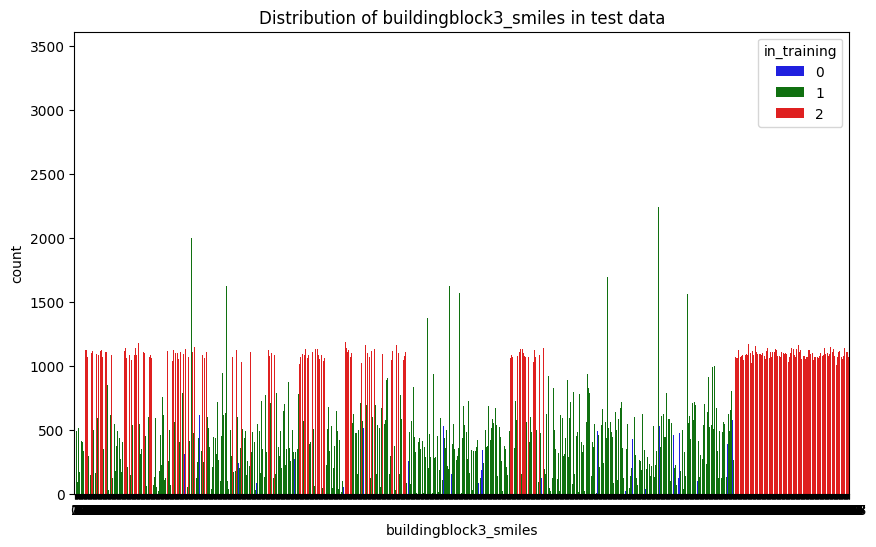

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='buildingblock3_smiles', hue='in_training', data=test_data, palette=colors)
plt.title(f'Distribution of buildingblock3_smiles in test data')
plt.show()